In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("trainData.csv", encoding='latin-1')
df.shape

(1599999, 6)

In [3]:
df.columns = ['target','id','date','flag','user','text']
df.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df= df.drop(['id','date','flag','user'],axis = 1)
df.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [5]:
df['target'].unique()

array([0, 4])

In [6]:
dict = {0 :  "Negative",
       4 : "Positive"}

df['target'] = df['target'].map(dict)
df.head()

,target,text
0,Negative,is upset that he can't update his Facebook by ...
1,Negative,@Kenichan I dived many times for the ball. Man...
2,Negative,my whole body feels itchy and like its on fire
3,Negative,"@nationwideclass no, it's not behaving at all...."
4,Negative,@Kwesidei not the whole crew


In [7]:
df['target'].unique()

array(['Negative', 'Positive'], dtype=object)

In [8]:
text = list(df['text'])
sentiment = list(df['target'])

**I. DATA CLEANING (CLEANING THE TEXT) :**

In [9]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [10]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
#              'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
#              'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
#              'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
#              'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
#              'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
#              'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
#              'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
#              'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
#              's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
#              't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
#              'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
#              'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
#              'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
#              'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
#              "youve", 'your', 'yours', 'yourself', 'yourselves']

In [13]:
def preprocess(text):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for word in text:
        word = word.lower()
        
        # Replace all URls with 'URL'
        word = re.sub(urlPattern,' URL',word)
        # Replace all emojis.
        for emoji in emojis.keys():
            word = word.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        word = re.sub(userPattern,' USER', word)        
        # Replace all non alphabets.
        word = re.sub(alphaPattern, " ", word)
        # Replace 3 or more consecutive letters by 2 letter.
        word = re.sub(sequencePattern, seqReplacePattern, word)

        tweetwords = ''
        for w in word.split():
            # Checking if the word is a stopword.
            if w not in stopwords.words('english'):
                # Lemmatizing the word.
                w = wordLemm.lemmatize(w)
                tweetwords += (w+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [14]:
processedtext = preprocess(text)

In [16]:
processedtext
# print(f'Text Preprocessing complete.')

['upset update facebook texting might cry result school today also blah ',
 'USER dived many time ball managed save 50 rest go bound ',
 'whole body feel itchy like fire ',
 'USER behaving mad see ',
 'USER whole crew ',
 'need hug ',
 'USER hey long time see yes rain bit bit lol fine thanks ',
 'USER nope ',
 'USER que muera ',
 'spring break plain city snowing ',
 'pierced ear ',
 'USER bear watch thought ua loss embarrassing ',
 'USER count idk either never talk anymore ',
 'USER would first gun really though zac snyder doucheclown ',
 'USER wish got watch miss USER premiere ',
 'hollis death scene hurt severely watch film wry director cut ',
 'file tax ',
 'USER ahh ive always wanted see rent love soundtrack ',
 'USER oh dear drinking forgotten table drink ',
 'USER day get much done ',
 'one friend called asked meet mid valley today time sigh ',
 'USER baked cake ated ',
 'week going hoped ',
 'blagh class 8 tomorrow ',
 'hate call wake people ',
 'going cry sleep watching marley 

In [17]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

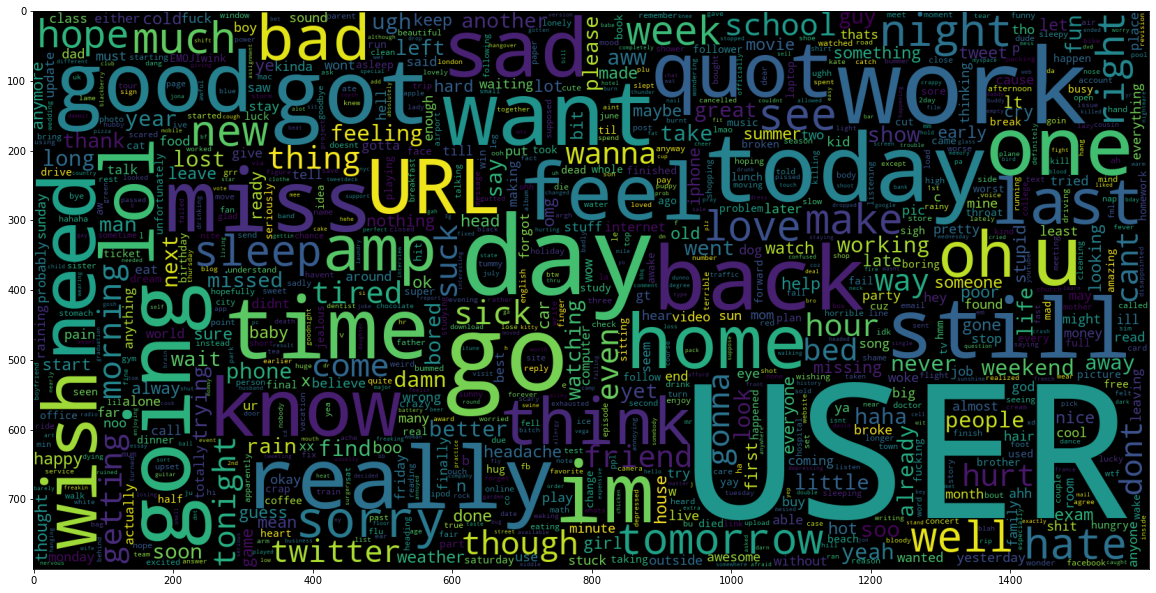

In [18]:
#Creating a Wordcloud Map of all the frequently occuring words in the NEGATIVE tweets
data_neg = processedtext[:800000]     #First 800000 are negative comments
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

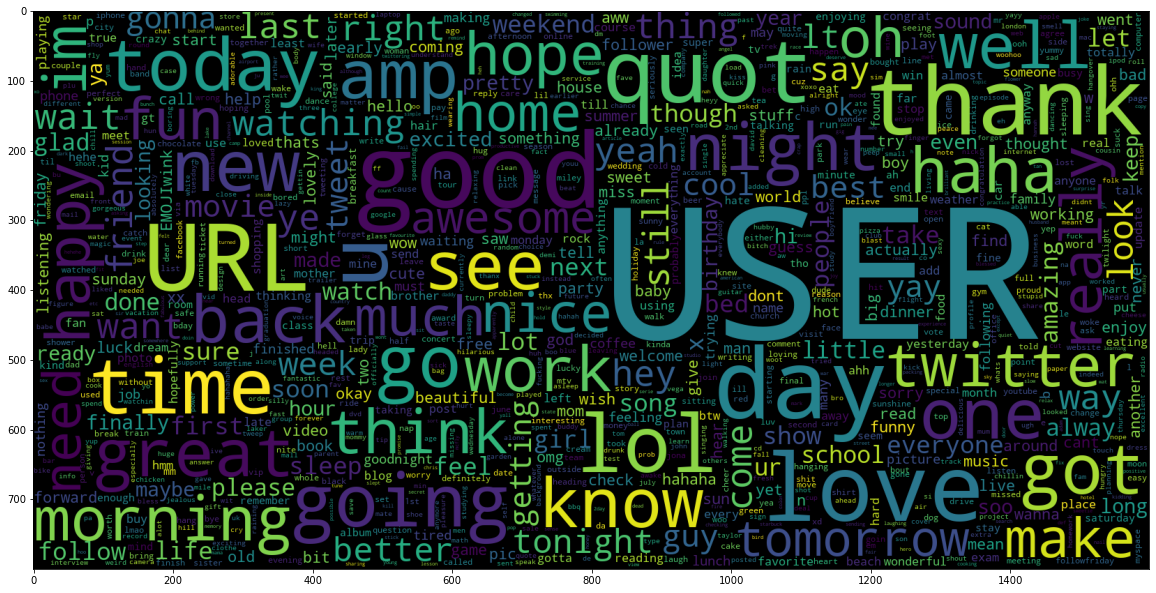

In [19]:
#Creating a Wordcloud Map of all the frequently occuring words in the POSITIVE tweets
data_pos = processedtext[800000:]      #Last 800000 are negative comments
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

**II. CREATING THE TEST-TRAIN SPLIT (80/20)**

In [20]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(processedtext, sentiment, test_size = 0.05, random_state = 0)

**III.VECTORIZATION (CONVERTING TEST TO NUMBER)**

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [22]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


**IV.MODEL BUILDING AND EVALUATING**

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [24]:
#Training the Naive Bayes Model!  

from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78     39986
    Positive       0.77      0.79      0.78     40014

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000

[[30722  9264]
 [ 8203 31811]]


In [25]:
# #Testing on some custom Test Cases : 
test_cases = ['I hope you had a good day', 
              'My day didnt go very well :(', 
              'I dont think that RCB should lost #dissapointed.', 
              'Yayay we won!',
              'Had a very tasty lunch at PizzaExpress #satisfied']
preprocessed_test_cases = preprocess(test_cases)
vectorised_test_cases = vectoriser.transform(preprocessed_test_cases)

In [26]:
predict_test_cases = BNBmodel.predict(vectorised_test_cases)
predict_test_cases

array(['Positive', 'Negative', 'Negative', 'Positive', 'Positive'],
      dtype='<U8')